<b>

<p>
<center>
<font size="5">
Medical Appointment No Shows Analysis - Project 1 - DATS 6202 - O10
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Machine Learning-1
    <br>
Author: Pradip Hayu
</font>
</center>
</p>

</b>

- [1 INTRODUCTION](#1-INTRODUCTION)
- [2 DATA PREPROCESSING](#2-DATA-PREPROCESSING)
    - [2.1 Supress unnecessary warnings](#2.1-Supress-unnecessary-warnings)
    - [2.2 Import Pandas/numpy](#2.2-Import-Pandas/numpy)
    - [2.3 Load the data](#2.3-Load-the-data)
    - [2.4 Shape](#2.4-Shape)
    - [2.5 Overview](#2.5-Overview)
    - [2.6 Setting up 'AppointmentID' as our index](#2.6-Setting-up-'AppointmentID'-as-our-index)
    - [2.7 Converting PatientId as an integer variable](#2.7-Converting-PatientId-as-an-integer-variable)
    - [2.8 Name Correction](#2.8-Name-Correction)
    - [2.9 Converting columns ScheduledDay and AppointmentDay into datetime64 format](#2.9-Converting-columns-ScheduledDay-and-AppointmentDay-into-datetime64-format)
    - [2.10 Printing unique values of relevant variables](#2.10-Printing-unique-values-of-relevant-variables)
    - [2.11 Dropping the variables'PatientID'](#2.11-Dropping-the-variables'PatientID')
    - [2.12 Final Cleaned up data](#2.12-Final-Cleaned-up-data)
- [3 EDA](#3-EDA)
    - [3.1 Features vs Status](#3.1-Features-vs-Status)
    - [3.2 Correlation Plot](#3.2-Correlation-Plot)
    - [3.3 Encode the categorical features](#3.3-Encode-the-categorical-features)
    - [3.4 Divide the data into training and testing](#3.4-Divide-the-data-into-training-and-testing)
    - [3.5 Oversampling](#3.5-Oversampling)
- [4 Trying Various Models And Comparing The Scores](#4-Trying-Various-Models-And-Comparing-The-Scores)
    - [4.1 Decision Tree](#4.1-Decision-Tree)
        - [4.1.1 The parameter grid for decision tree](#4.1.1-The-parameter-grid-for-decision-tree)
    - [4.2 Random Forest](#4.2-Random-Forest)
        - [4.2.1 The parameter grid for random forest](#4.2.1-The-parameter-grid-for-random-forest)
    - [4.3 KNeighbors](#4.3-KNeighbors)
        - [4.3.1 The parameter grid for KNN](#4.3.1-The-parameter-grid-for-KNN)
    - [4.4 Gaussian Naive Bayes](#4.4-Gaussian-Naive-Bayes)
        - [4.4.1 The parameter grid for GNB](#4.4.1-The-parameter-grid-for-GNB)
    - [4.5 Logistic Regression](#4.5-Logistic-Regression)
        - [4.5.1 The parameter grid for logistic regression](#4.5.1-The-parameter-grid-for-logistic-regression)
- [5 Model Comparison](#5-Model-Comparison)
- [6 Hyperparameter Tuning](#6-Hyperparameter-Tuning)
- [7 Model Selection](#7-Model-Selection)
- [8 Modeling Random Forest](#8-Modeling-Random-Forest)
    - [8.1 Misclassification rate](#8.1-Misclassification-rate)
    - [8.2 Evaluation Metrics](#8.2-Evaluation-Metrics)
- [9 Conclusion](#9-Conclusion)

# 1 INTRODUCTION

Often patients set up medical appointments and fail to show up to their appointments. The data suggests that 30% of patients miss their appointments. Using data on different features of a patient, we plan to train a model with a high degree of confidence in order to isolate the most important variables that impact whether or not a patient is no-show for an appointment. We applied hyperparameter tuning and model selection on five different classifiers, discovered the best hyperparameters and then declared the best model. Through this project, we aim to inform our audiences regarding the significant features that determine an appointment show or no show. We are hopeful this will help decrease the problem of missed appointments. 

# 2 DATA PREPROCESSING

## 2.1 Supress unnecessary warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

## 2.2 Import Pandas/numpy

In [2]:
import os
import pandas as pd
import numpy as np

## 2.3 Load the data

In [3]:
#Load the data
df = pd.read_csv('KaggleV2-May-2016.csv', header = 0)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 2.4 Shape

In [4]:
df.shape
#14 variables, 110527 entries

(110527, 14)

## 2.5 Overview

In [5]:
df.info()
#There are no Null values in the data.
#PatientId is classfied as float. It needs to be converted to integer
#AppointmentID should be our index.
#ScheduledDay and AppointmentDay needs to be converted to datatime64 format.
#Some of the columns are misspelled. Need to correct the names of those columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## 2.6 Setting up 'AppointmentID' as our index

In [6]:
df.set_index('AppointmentID', inplace = True)

## 2.7 Converting PatientId as an integer variable

In [7]:
df[~df.PatientId.apply(lambda x: x.is_integer())]
df['PatientId'] = df['PatientId'].astype('int64')

## 2.8 Name Correction

In [8]:
df.rename(columns={'PatientId':'PatientID', 'Neighbourhood':'Neighborhood', 'Hipertension':'HyperTension',
                   'Handcap':'Handicap', 'No-show':'Status' }, inplace = True)

In [9]:
#For 'Status' column, 'Yes' means patients didn't show up to their appointments and 'No' means patients showed up 
#to their appointments. It was a little confusing interpretation, so we are replacing the column values of 'Status'
#as follows: 'No' to 'Show-Up' and 'Yes' to 'No-Show'
df['Status'].replace(['No', 'Yes'],['Show-Up','No-Show'],inplace=True)

## 2.9 Converting columns ScheduledDay and AppointmentDay into datetime64 format

In [10]:
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

## 2.10 Printing unique values of relevant variables

In [11]:
print('Gender:', df.Gender.unique())
print('Age:', sorted(df.Age.unique()))
print('Neighborhood:', df.Neighborhood.unique())
print('Scholarship:', df.Scholarship.unique())
print('HyperTension:', df.HyperTension.unique())
print('Diabetes:', df.Diabetes.unique())
print('Alcoholism:', df.Alcoholism.unique())
print('Handicap:', df.Handicap.unique())
print('SMS_received', df.SMS_received.unique())
print('Status', df.Status.unique())

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighborhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃ

In [12]:
df['Neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [12]:
#We saw that Age had -1 and 0 values
[(row, value) for row, value in df['Age'].value_counts().items() if row < 1]

[(0, 3539), (-1, 1)]

In [13]:
#We will get rid of these rows with ages -1 and 0 since it doesn't make sense
df.drop(df[df.Age<1].index, inplace=True)

## 2.11 Dropping the variables'PatientID' 

In [14]:
df.drop(['PatientID'], axis=1, inplace=True)

## 2.12 Final Cleaned up data

In [15]:
df.info() #Everything looks good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 5642903 to 5629448
Data columns (total 12 columns):
Gender            106987 non-null object
ScheduledDay      106987 non-null datetime64[ns]
AppointmentDay    106987 non-null datetime64[ns]
Age               106987 non-null int64
Neighborhood      106987 non-null object
Scholarship       106987 non-null int64
HyperTension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handicap          106987 non-null int64
SMS_received      106987 non-null int64
Status            106987 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.6+ MB


# 3 EDA

In [16]:
#Status is our target variable. Let's get the value counts of Status as 'Show-Up' or 'No-Show'
df['Status'].value_counts()

Show-Up    85307
No-Show    21680
Name: Status, dtype: int64

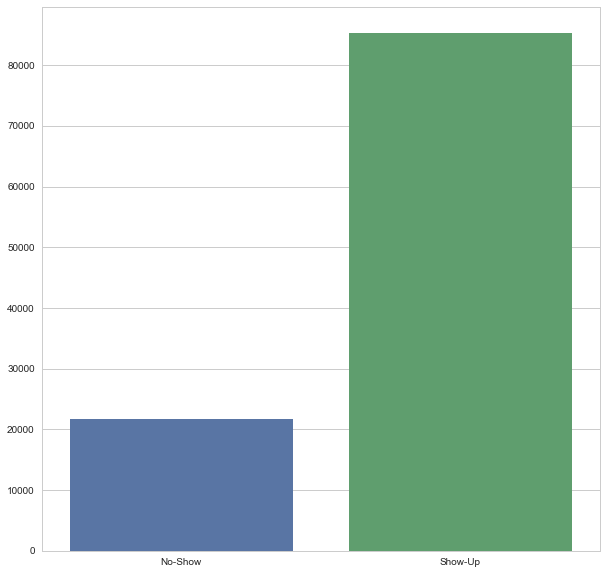

In [17]:
#Barplot of the Status Count
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "whitegrid")
group = df.groupby(['Status'])
gs = group.size()
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = gs.index.tolist(), y = gs.values)
plt.show()


About 20% of the patients are no show to their appointments

## 3.1 Features vs Status

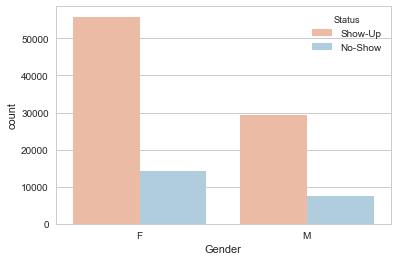

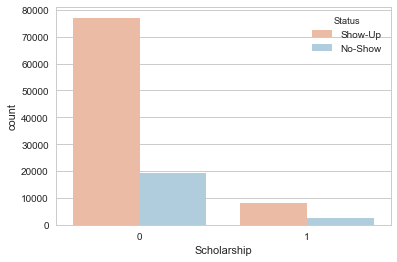

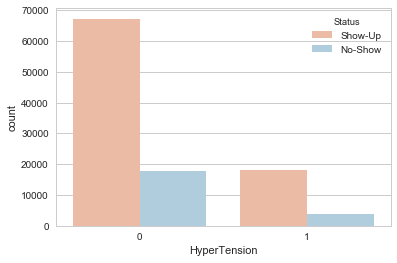

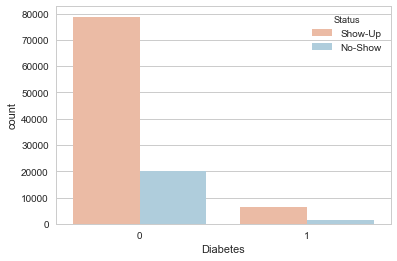

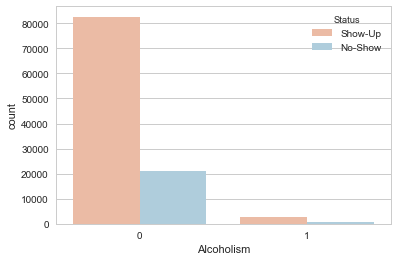

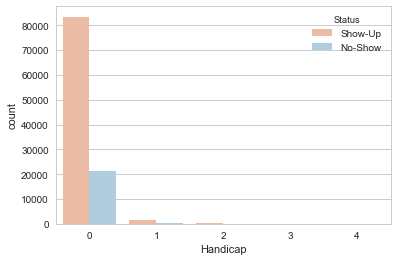

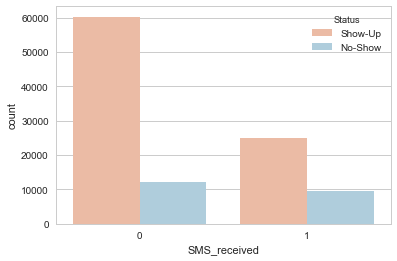

In [18]:
sns.countplot(x='Gender', hue='Status', data=df, palette='RdBu')
plt.show();

sns.countplot(x='Scholarship', hue='Status', data=df, palette='RdBu')
plt.show();

sns.countplot(x='HyperTension', hue='Status', data=df, palette='RdBu')
plt.show();

sns.countplot(x='Diabetes', hue='Status', data=df, palette='RdBu')
plt.show();

sns.countplot(x='Alcoholism', hue='Status', data=df, palette='RdBu')
plt.show();

sns.countplot(x='Handicap', hue='Status', data=df, palette='RdBu')
plt.show();

sns.countplot(x='SMS_received', hue='Status', data=df, palette='RdBu')
plt.show();

## 3.2 Correlation Plot

Text(0.5,1,'Correlation Between Variables')

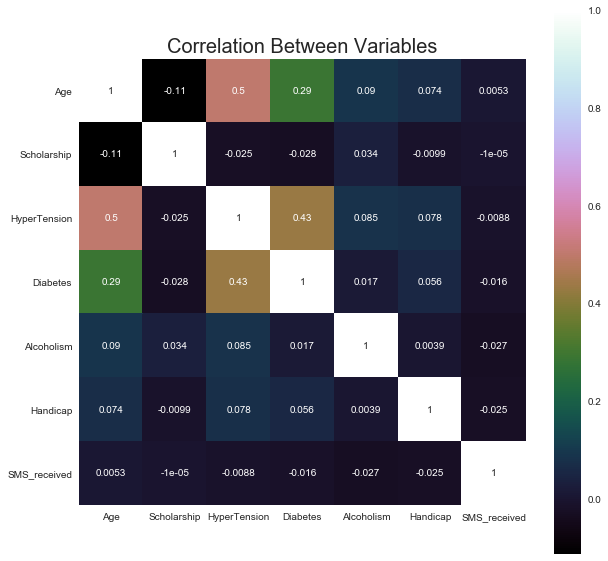

In [19]:
#Relationship between numeric variables
correlation = df.corr()
plt.figure(figsize = (10,10))
corr = sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'cubehelix')
corr.figure.set_size_inches(10,10)
plt.title("Correlation Between Variables", size = 20)

Most of the numeric variables are not highly correlated with each other

## 3.3 Encode the categorical features


In [20]:
#Encoding the features using One-hot encoding
data = pd.get_dummies(df.drop(["ScheduledDay", "AppointmentDay"], 
                                 axis=1)).drop(["Status_No-Show"], axis=1)
data.head()

#one hot encoding only works for categorical features by default.

,Age,Scholarship,HyperTension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_F,Gender_M,Neighborhood_AEROPORTO,...,Neighborhood_SEGURANÇA DO LAR,Neighborhood_SOLON BORGES,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_UNIVERSITÁRIO,Neighborhood_VILA RUBIM,Status_Show-Up
AppointmentID,,,,,,,,,,,,,,,,,,,,,
5642903,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5642503,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5642549,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5642828,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5642494,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
#Getting the features(x) and target(y)
x = data.drop(["Status_Show-Up"], axis=1)
y = data["Status_Show-Up"]

In [22]:
x.shape[0], y.shape[0]

(106987, 106987)

In [23]:
y.value_counts() #Target variable is already 1s and 0s so no need to encode the target

1    85307
0    21680
Name: Status_Show-Up, dtype: int64

In [24]:
# Encoding the categorical target

In [25]:
# Target variable is already 1s and 0s so no need to encode the target

# Print the unique value and their number for the target
#y.value_counts()

#Encoding the categorical target
#from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder
#ss = StandardScaler()
#le = preprocessing.LabelEncoder()
#y = le.fit_transform(y)

#pd.DataFrame(data=y, columns=['Status_Show-Up'])['Status_Show-Up'].value_counts()

## 3.4 Divide the data into training and testing

In [26]:
#Dividing the data into training and testing (with test_size=0.3 and random_state = 0)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

#We need to split first before oversampling because our test data needs to be untouched

In [27]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((74890, 90), (74890,), (32097, 90), (32097,))

## 3.5 Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

#RandomOverSampler (with random_state=0) 
ros = RandomOverSampler(random_state=0) #declare random sampler
X_train_over, Y_train_over = ros.fit_sample(X_train, Y_train) #use that random sampler 

#Oversampling is performed on our training data

# 4 Trying Various Models And Comparing The Scores ###

## 4.1 Decision Tree

### 4.1.1 The parameter grid for decision tree
The hyperparameters we want to fine tune are:

- min_samples_split

- min_samples_leaf

See details of the meaning of the hyperparametes in sklearn decision tree documentation



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [31]:
param_grids = {}

In [32]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

In [33]:
#Decision Tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
pipe_dt = Pipeline([('StandardScaler', StandardScaler()), ('DecisionTreeClassifier', DecisionTreeClassifier())])
pipe_dt.fit(X_train_over, Y_train_over)
acc_dt = round(pipe_dt.score(X_test, Y_test)*100, 2)
print("Decision Tree is %2.2f" %acc_dt)
#DecisionTree as dt


/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Decision Tree is 61.06


/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## 4.2 Random Forest 

### 4.2.1 The parameter grid for random forest
The hyperparameters we want to fine tune are:

- n_estimators

- min_samples_split

- min_samples_leaf

See details of the meaning of the hyperparametes in sklearn random forest documentation

In [34]:
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

In [35]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())])
pipe_rf.fit(X_train_over, Y_train_over)
acc_rf = round(pipe_rf.score(X_test, Y_test)*100, 2)
print("Random Forest Classifier is %2.2f" %acc_rf)
#RandomForestClassifier as rf

/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Random Forest Classifier is 62.64


/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## 4.3 KNeighbors 

### 4.3.1 The parameter grid for KNN
The hyperparameters we want to fine tune are:

- n_neighbors

See details of the meaning of the hyperparametes in sklearn KNN documentation

In [36]:
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

param_grids['knn'] = param_grid

In [37]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
pipe_knn = Pipeline([('StandardScaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])
pipe_knn.fit(X_train_over, Y_train_over)
acc_knn = round(pipe_knn.score(X_test, Y_test)*100, 2)
print("KNeighbours Classifier is %2.2f" %acc_knn)
#KNeighbors Classifier as knn 

/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


KNeighbours Classifier is 68.62


## 4.4 Gaussian Naive Bayes

### 4.4.1 The parameter grid for GNB
The hyperparameters we want to fine tune are:

- var_smoothing

See details of the meaning of the hyperparametes in sklearn GNB documentation

In [38]:
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]

param_grids['gnb'] = param_grid


In [39]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
pipe_gaussian = Pipeline([('StandardScaler', StandardScaler()), ('GaussianNB', GaussianNB())])
pipe_gaussian.fit(X_train_over, Y_train_over)
acc_gaussian = round(pipe_gaussian.score(X_test, Y_test)*100, 2)
print("Gausssian Naive Bayes %2.2f" %acc_gaussian)
##Gaussian Naive Bayes as gaussian

/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Gausssian Naive Bayes 24.76


/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## 4.5 Logistic Regression

### 4.5.1 The parameter grid for logistic regression
The hyperparameters we want to fine tune are:

- multi_class

- solver

- C

Here we need to use two dictionaries in the parameter grid since 'multinomial' (multi_class) 
does not support 'liblinear' (solver). 

See details of the meaning of the hyperparametes in sklearn logistic regression documentation

In [40]:
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid


In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
pipe_lr = Pipeline([('StandardScaler', StandardScaler()), ('LogisticRegression', LogisticRegression())])
pipe_lr.fit(X_train_over, Y_train_over)
acc_lr = round(pipe_lr.score(X_test, Y_test)*100, 2)
print("Logistic Regression is %2.2f" %acc_lr)
#Logistic Regression as lr

/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Logistic Regression is 60.21


/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# 5 Model Comparison

In [42]:
#Model Comparasion
models = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 
              'Logistic Regression','Naive Bayes'],
    'Score': [acc_rf,acc_dt, 
              acc_knn, acc_lr, 
              acc_gaussian]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,KNN,68.62
0,Random Forest,62.64
1,Decision Tree,61.06
3,Logistic Regression,60.21
4,Naive Bayes,24.76


# 6 Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from time import time

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []


# For each classifier
for name in pipe_clfs.keys():
    start = time()
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    #print(X_train_over.shape[0], Y_train_over.shape[0])
    gs = gs.fit(X_train_over, Y_train_over)
    
    print(name, time() - start)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    

lr 506.56864738464355
dt 19.393314599990845
rf 64.87646651268005
knn 4731.663633823395
gnb 13.3987717628479


# 7 Model Selection

In [45]:
#Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

#For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], 
           type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.7464329972870684, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.7460645744716482, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.6851743309776602, {'clf__n_neighbors': 2}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.5799226312087618, {'clf__C': 0.0001, 'clf__multi_class': 'ovr', 'clf__solver': 'liblinear'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.512869678802291, {'clf__var_smoothing': 1e-08}, <class 'sklearn.naive_bayes.GaussianNB'>]



# 8 Modeling Random Forest

/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean Accuracy:
0.6264136835218245
Confusion Matrix:


/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[[ 2890  3614]
 [ 8377 17216]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.44      0.33      6504
           1       0.83      0.67      0.74     25593

   micro avg       0.63      0.63      0.63     32097
   macro avg       0.54      0.56      0.53     32097
weighted avg       0.71      0.63      0.66     32097



/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


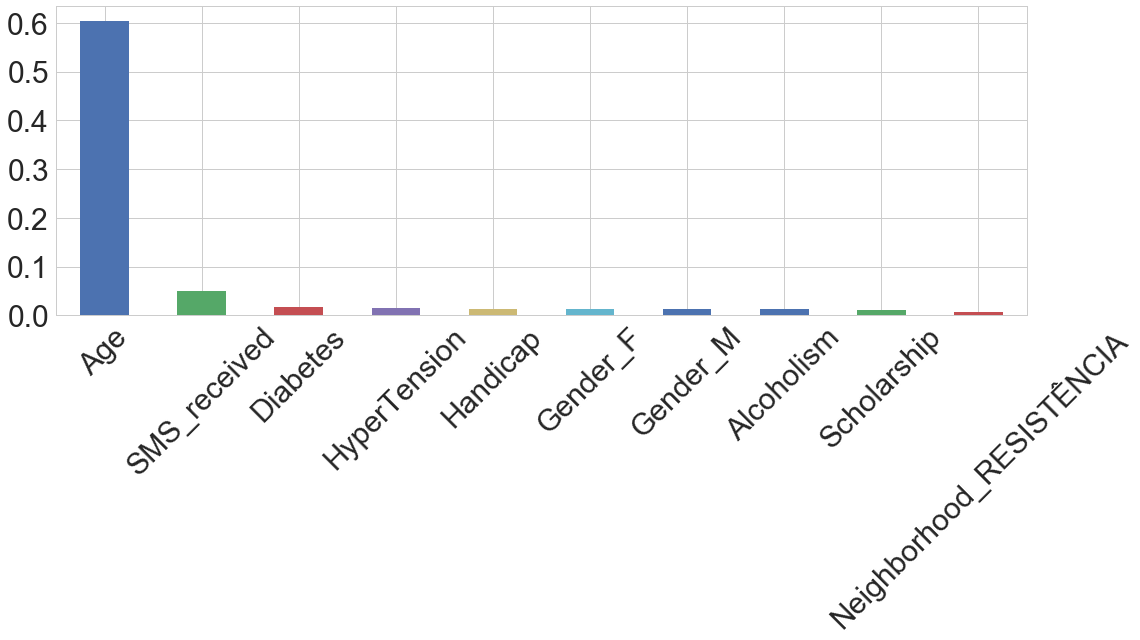

In [43]:

from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=100)
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())])
pipe_rf.fit(X_train_over, Y_train_over)

#Performance Check
print("Mean Accuracy:")
print(pipe_rf.score(X_test, Y_test))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, pipe_rf.predict(X_test)))

print("Classification Report:")
print(classification_report(Y_test, pipe_rf.predict(X_test)))

#Plotting feature importance
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, x.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False).nlargest(10)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

● TRUE POSITIVES : 2890 people did not show up to their appointments, and model also correctly predict them to be
belonging to zero or no show. This is a correct classification.

● TRUE NEGATIVES : Model predicts 17216 people show up to their appointment which is true.

## 8.1 Misclassification rate

● FALSE POSITIVES : 8377 people actually do not show up to their appointments, but the model predicted them to be showing up to their appointments.

● FALSE NEGATIVES : 3614 people actually showed up to their appointments, but the model predicted them as no shows

## 8.2 Evaluation Metrics
We use the classification report to get a better understanding of our model. Howeverin our situation we want to classify if a patient shows up or not. What we need to take care of is that our model shouldn't predict a no show as a show up and vice versa. So a wrong prediction in any scenario would be less than ideal, which would indicate that accuracy would be a better metric since false positives and false negatives have similar cost.

In [44]:
!pip install pydotplus
!pip install Graphviz
!pip install Image

You are using pip version 18.0, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
fake_dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#pipe_dt.named_steps['DecisionTreeClassifier']
fake_dt.fit(X_train_over, Y_train_over)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

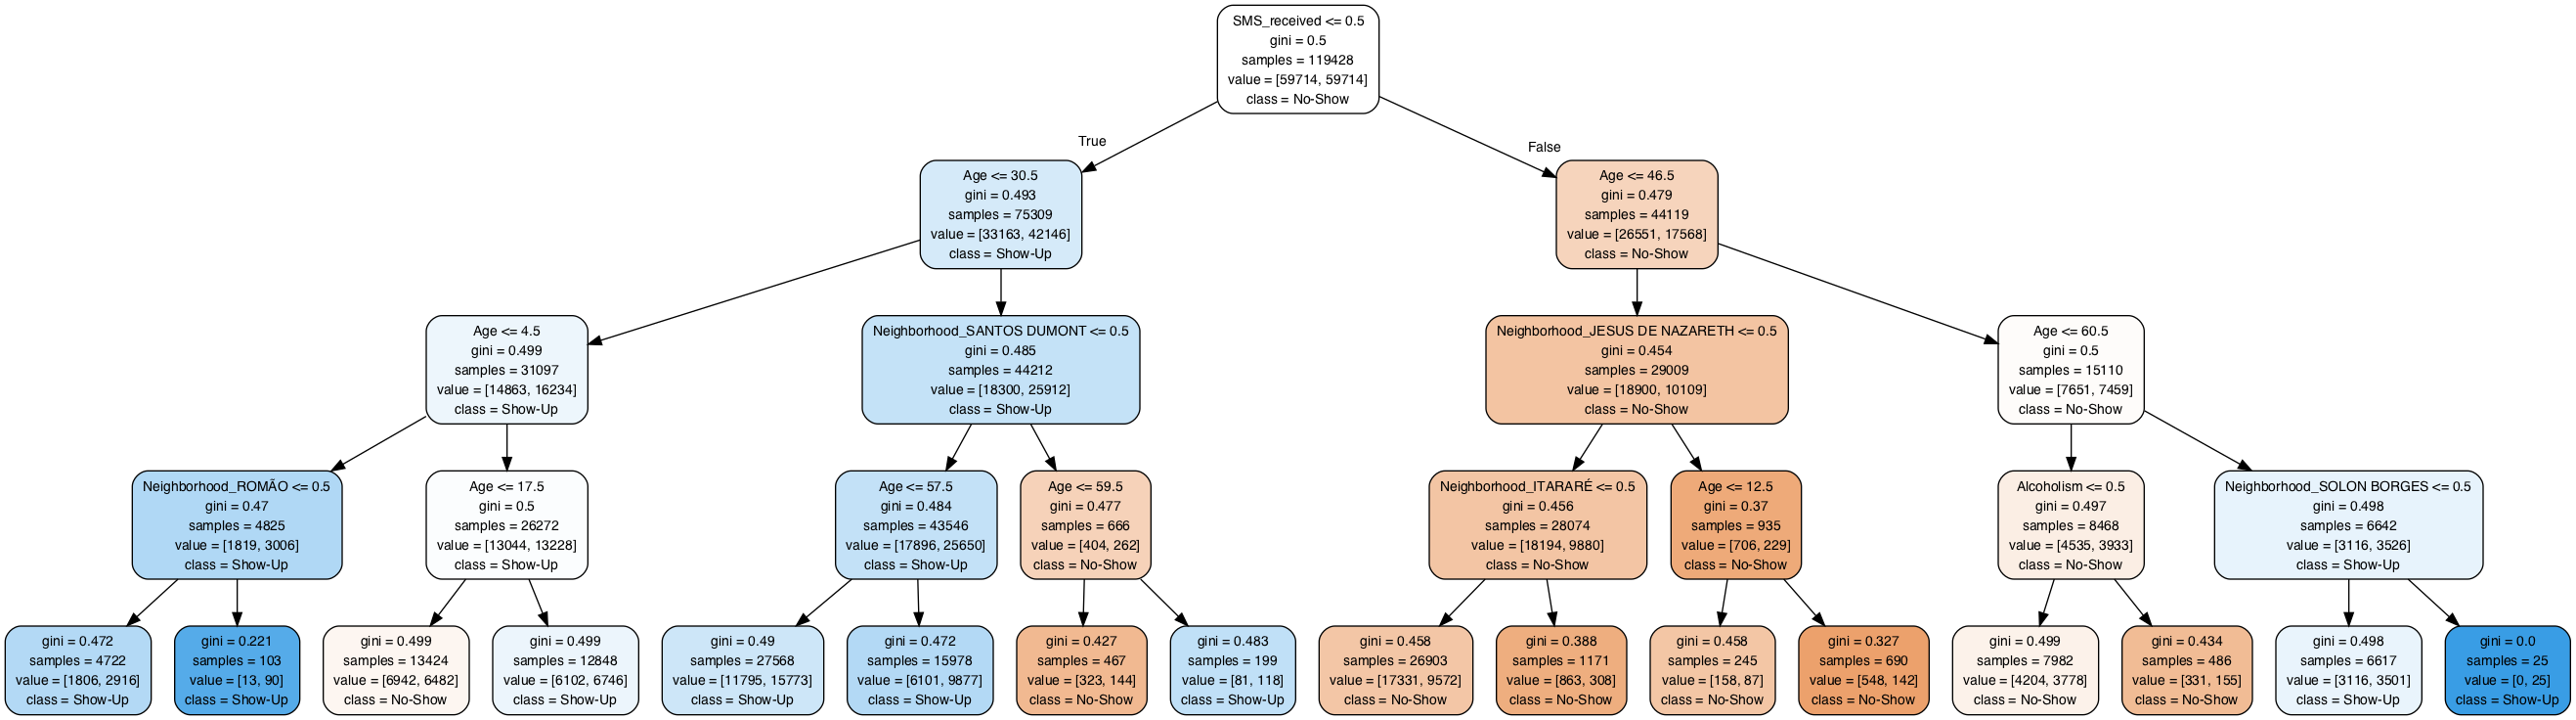

In [46]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(fake_dt,
                           filled=True, 
                           rounded=True,
                           class_names=['No-Show', 
                                        'Show-Up'],
                           feature_names=x.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

In [47]:
vars(pipe_dt.named_steps['DecisionTreeClassifier'])

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'random_state': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': False,
 'n_features_': 90,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=uint8),
 'n_classes_': 2,
 'max_features_': 90,
 'tree_': <sklearn.tree._tree.Tree at 0x1a1c751988>}

In [48]:
pipe_dt.named_steps['DecisionTreeClassifier'].tree_.node_count

32609

# 9 Conclusion

Our project explored various feature of the Medical appointment data. Our goal initially was to find the most important features that affect the status of medical appointments. i.e. people who showed up or not showed up. We found that Age was the most important feature on our random forest model. We used the random forest model because it returned the highest accuracy and that is our best model for predicting medical appointment no-shows. 

We approached this task by creating five different classifiers namely: Random Forest, Decision Tree, Logistic Regresssion, KNN, and Gaussian Naive Bayes.We also ran each model and compared the accuracy by using the score function. KNN had the highest accuracy out of all the models compared.
Then, we chose the hyperparameters for those classsifiers and fine tuned them. The best(fine tuned) hyperparameters were obtained from Decision Tree and Random Forest. 

The most important feature from our hyperparameter tuning was the Age variable. This follows from our intuition that people who are older have more responsibilities and their medical appointments could potentially clash with their business ventures or personal obligations to their spouses, children or business partners. 